In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Plotting Simulation Data

Using an existing dataset of chimeric P450s (Otey, C. R. et al. Structure-Guided Recombination Creates an Artificial Family of Cytochromes P450. PLoS Biol 4, e112 (2006).), we allowed our learning system to pick sequences and recieve a T50 or inactive result as if they were performing experiments. These simulated learning processes were repeated 10000 times each for the random selection, UCB, predicted positive UCB, and expected UCB algorithms. Plots of the results of those simulations can be found below. 

First, we load all the simulation data.

In [2]:
import analyze_simulation
run_T50s = analyze_simulation.get_simulation_data()

run_date = '20221130'  # The included simulation data is from this date
dataset = 'P450reduced'  # The name of the dataset used in simulations
strategies = ['random_selection', 'ucb', 'pp_ucb', 'expected_ucb']


The first plot of interest is the mean maximum observation across agents as a function of the number of rounds spent iterating.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


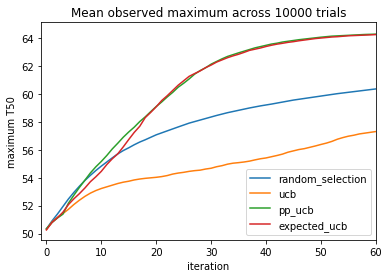

In [3]:
analyze_simulation.learning_curve(run_T50s, run_date, dataset, strategies)

Next, we plot the number of iterations required to reach a sequence in the 90th percentile for thermostability. The main observation here is that pp_ucb and expected_ucb are roughly tied as the best algorithm tried, with ucb only mrginally better than random selection.

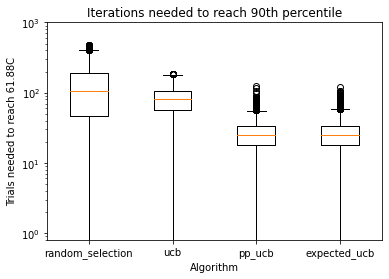

In [4]:
analyze_simulation.iteration_boxplot(run_T50s, run_date, dataset, strategies)

Finally, we plot the same data from the box plots as overlapping histograms to make it easier to visualize the fine differences, especially between pp_ucb and expected_ucb.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


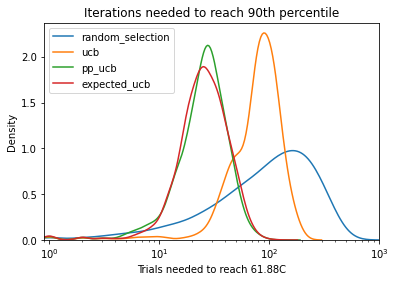

In [5]:
analyze_simulation.iteration_histogram(run_T50s, run_date, dataset, strategies)

In [6]:
import Assess_Fit as af
import make_Fig3_panels as fig3

In [7]:

learn_state = af.learn_state

with open('all_data_variants.p', 'rb') as pkl:
    all_data_full, all_data_unobserved, all_data_observed = pickle.load(pkl)
with open('all_data_variants_unified.pkl', 'rb') as pkl:
    all_data_unified, all_data_full_unified, all_data_observed_unified = pickle.load(
        pkl)
with open('pearson_trace.pkl', 'rb') as pkl:
    trace = pickle.load(pkl)
with open('prediction_trace.pkl', 'rb') as pkl:
    pred_trace = pickle.load(pkl)
with open('probability_trace.pkl', 'rb') as pkl:
    prob_trace = pickle.load(pkl)

# Overview of each agent's learning process

Here, red points are observed active sequences. Black points are observed inactive sequences. Gray points are those that cannot be assigned to either category, either because they failed some step of the experimental process, because the data received could not be fit to a double logistic curve, or because the magnitude of the fitted curve was too low to meet the threshold for an active label and the sequence was labeled for retry. In the third case, a second observation of that type would yield an inactive label, and so all black points have a preceding gray point for the same sequence.

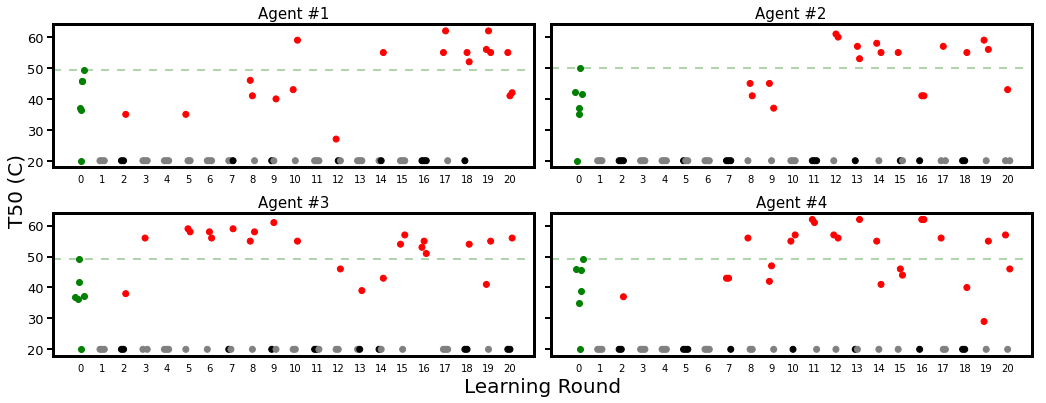

In [8]:
import plot_learn

# Each agent's understanding of the landscape after round 20

Here we examine the general distribution of T50, probability, and uncertainty for each agent. Points are colored based on eUCB, with more orange colors corresponding to higher eUCB. Agents with more spread in probability are more influenced by probability in their decision making. Agents with more spread in T50 are less affected by uncertainty in their decision making. The population of high-eUCB, low probability/T50 points for agent 3 represents an unexplored region of sequence space.

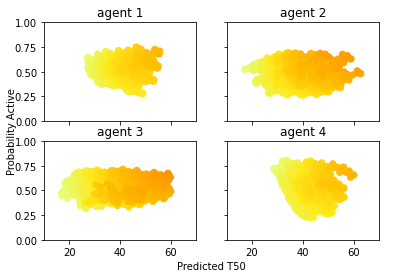

In [9]:
af.mean_prob_plot(all_data_full, single_plot=False, sort_color=True, save=False)

# All predictions over time

T50 Predictions. Sequences that outperform the best parent by at least 10C are highlighted in green. High-T50 or unexpeted results generally lead to many of the gray traces crossing one another.

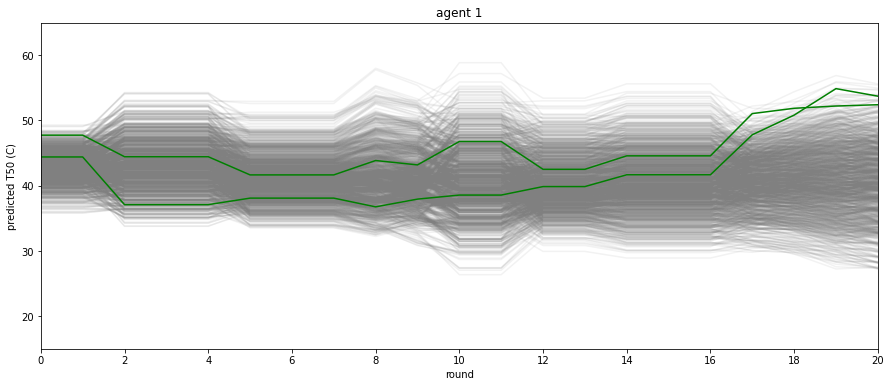

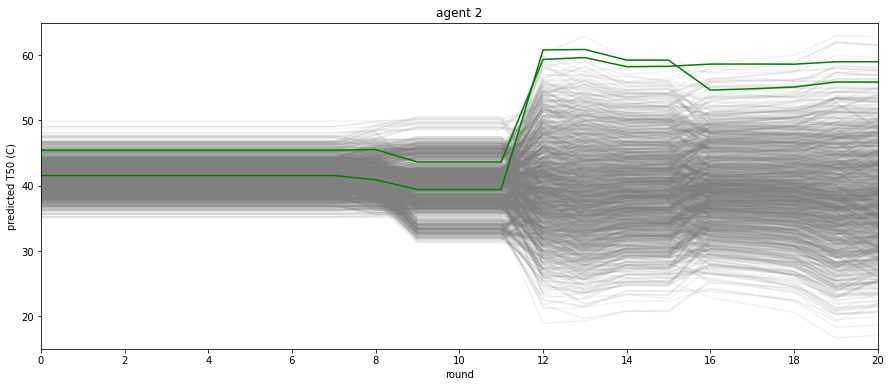

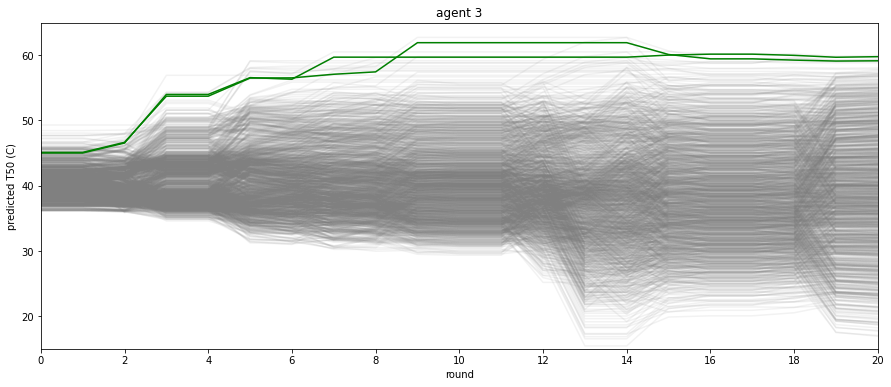

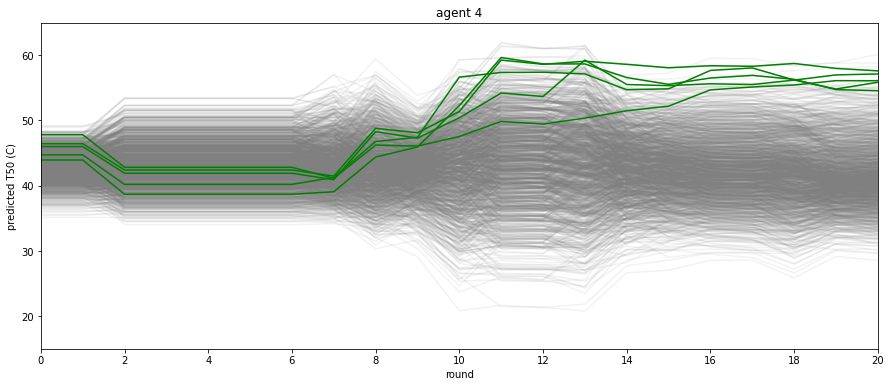

In [10]:
af.plot_full_trace(pred_trace)

Probability predictions. Sequences that outperform the best parent by 10C are highlighted in green. Unexpected results cause many lines to cross as the model restructures itself.

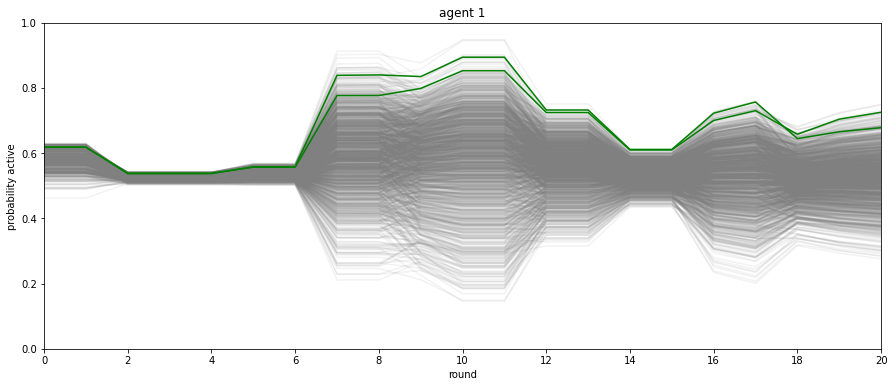

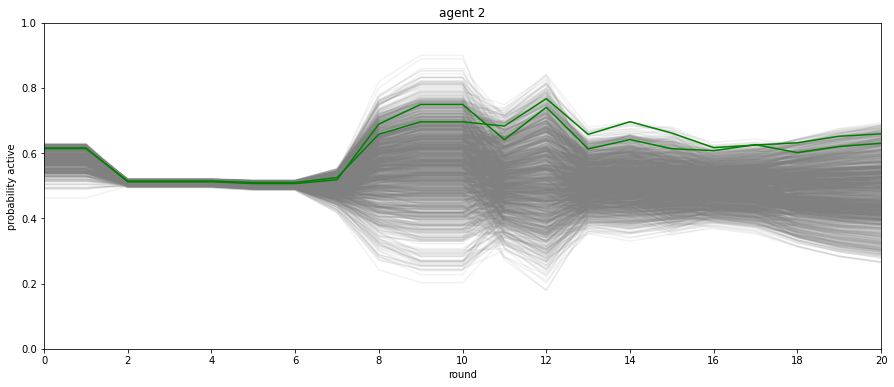

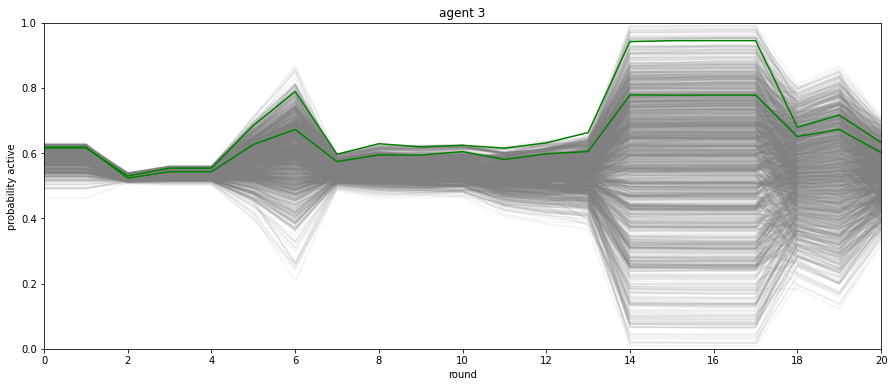

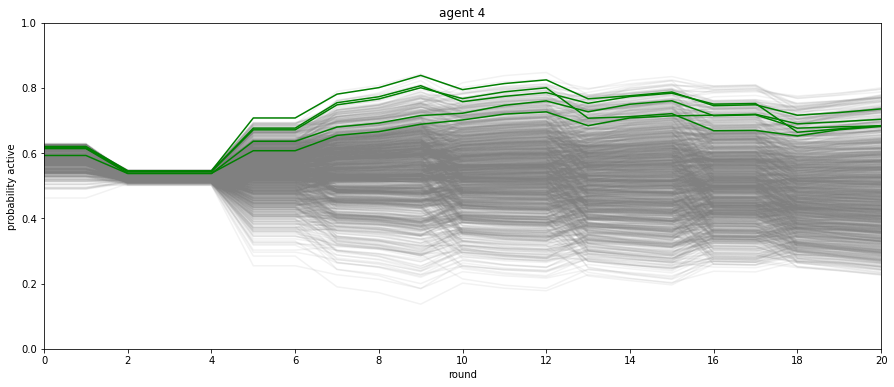

In [11]:
af.plot_full_prob_trace(prob_trace)

In [12]:
# Load data for next set of analyses
T50_df = pd.read_csv('all_mean_preds.csv',index_col='index')
std_df = pd.read_csv('all_std_preds.csv',index_col='index')
prob_df = pd.read_csv('all_prob_preds.csv',index_col='index')
y_hat, unified_T50_df = fig3.unified_model(all_data_full_unified)

# Comparing Performance of Agents

First, we compare each agent's understanding of the T50 landscape at each step against a model built from all the data from all agents pooled together. As we would expect, the agents all agree more with the unified model as they get more data.

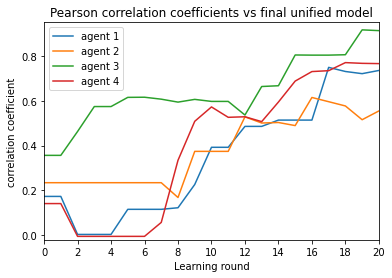

In [13]:
fig3.pearson_vs_background(T50_df, unified_T50 = y_hat, save=False)

Next, we assess how much each agent agrees with each other agent as rounds pass. As we might expect, the agents generally tend to agree less at the start as they have different limited data to form their models, and more toward the end as they converge to a consistent understanding of what makes a high-T50 sequence.

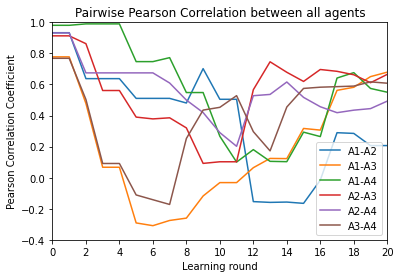

In [14]:
fig3.pairwise_pearson(T50_df, save=False)

To assess the influence of uncertainty on each model at round 20, we examined the mean uncertainty of each agent, binned based on the predicted T50. An agent with lower T50 uncertainty will generally rely more heavily on predicted T50 and probabilty of activity to drive further decision making.

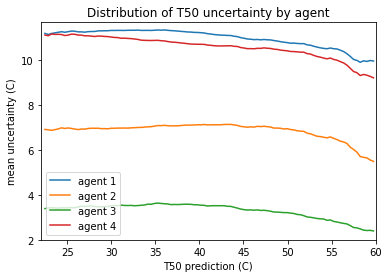

In [15]:
fig3.landscape_confidence(std_df, prob_df, unified_T50_df, save=False)

Finally, we examine the importance of mean, uncertainty, and probability of activity on sequence choices for each agent. Values are averaged for the three sequences chosen in each batch.

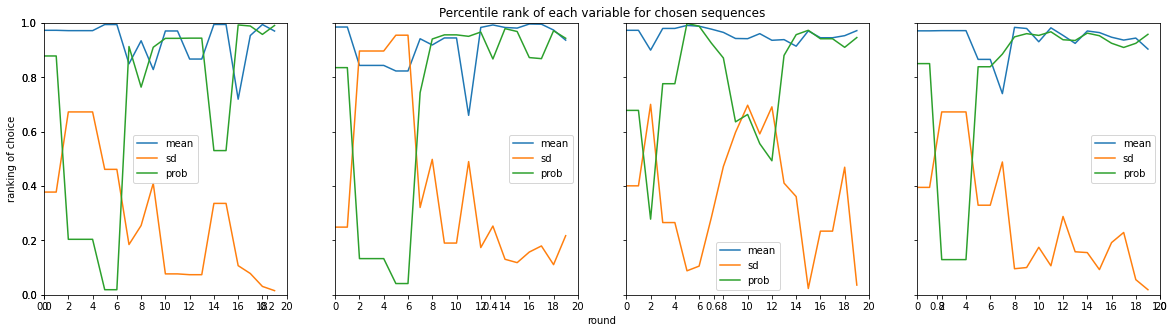

In [16]:
fig3.choice_percentiles(T50_df, std_df, prob_df, save=False)

# Human Validation of Designed Proteins

Finally, after running the robot to completion, we cloned each agent's highest-performing protein onto an expression vector to manually verify the T50 improvements. First, we grew cultures overnight, lysed them in PBS, and cooked aliquots of the protein at a series of temperatures. The heated aliquots were mixed with fluorogenic substrate and the kinetic data was used to generate a melt curve, seen below.

[0.15947942 0.00124897 0.03651963 0.1294616 ]
1111: logistic_regression_fit(magnitude=-14.922281788572986, steepness=0.4293309499616429, midpoint=47.67610121973946, y_adjust=14.823273266372741)
[0.01148267 0.00736341 0.06013298 0.00537631]
6151: logistic_regression_fit(magnitude=-3.8620223730045087, steepness=0.5333587125926672, midpoint=55.533000885899376, y_adjust=3.805581794718759)
[0.00805437 0.32594796 0.50297802 0.00491435]
6251: logistic_regression_fit(magnitude=-2.1900339234213915, steepness=0.849859355293089, midpoint=54.024954005738365, y_adjust=2.189816858721331)
[0.02638097 0.00027456 0.01499136 0.01753536]
6311: logistic_regression_fit(magnitude=-14.394692140088756, steepness=0.4314413129697219, midpoint=52.77330014911273, y_adjust=14.259817125666803)
[0.0295532  0.00093123 0.04177234 0.01430597]
6511: logistic_regression_fit(magnitude=-8.451585165945312, steepness=0.38703296651244234, midpoint=55.411862080337116, y_adjust=8.33371299560826)
[0.15517381 0.00258389 0.0676603

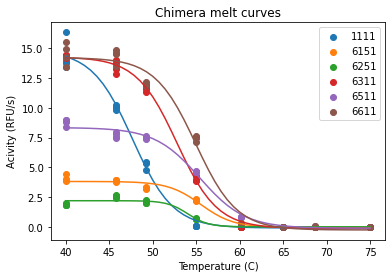

In [17]:
import complex_plot as cp
from collections import namedtuple

filenames = ['manual_kinetic_data/20221220_Thermostability_1111_6151_6251.csv',
            'manual_kinetic_data/20221220_Thermostability_6311_6511_6611.csv']

arg_tuple = namedtuple('arg_tuple',
                       ['curve', 'delimiter', 'save', 'split_replicates', 'title', 'window', 'y_scale'],
                      defaults=['logistic', '-', False, False, None, None, None])

args = arg_tuple(title='Chimera melt curves', y_scale=794641892.5)

for filename in filenames:
    data = pd.read_csv(filename, index_col='Time [s]')
    cp.melt_curve(data, args)
    
plt.legend()

We also collected kinetic data at a range of substrate concentrations to get a Michaelis-Menten plot for each designed chimera.

1111: michaelis_menten_fit(Vmax=8.726073056299426e-08, KM=85.3417577665548)
6151: michaelis_menten_fit(Vmax=4.494511862189712e-08, KM=218.16095471695866)
6251: michaelis_menten_fit(Vmax=3.4132637806666367e-08, KM=209.40833579289452)
6311: michaelis_menten_fit(Vmax=6.954429162704113e-08, KM=108.19431680753213)
6511: michaelis_menten_fit(Vmax=7.97373641191784e-08, KM=137.58518939424104)


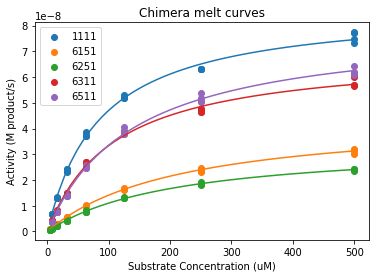

In [18]:
filenames = ['manual_kinetic_data/20230905_MM_Kinetics_1111.csv',
            'manual_kinetic_data/20230906_MM_Kinetics_6151_6251.csv',
            'manual_kinetic_data/20230906_MM_Kinetics_6311_6511.csv']

for filename in filenames:
    data = pd.read_csv(filename, index_col='Time [s]')
    cp.Michaelis_Menten_plot(data, args)
    
plt.legend()